## Preprocessing gender file

pictures --> image
tags --> label

In [48]:
import os
import glob
import pandas as pd
import cv2

In [18]:
os.mkdir("coco_gender/labels/train")
df = pd.read_csv("coco_gender/val_label.csv")
df

filename  xmin  ymin  xmax  ymax  class
0      000003_ch01_20190314082142_000001.jpeg   648   305   852   460    man
1      000003_ch01_20190314082142_000001.jpeg   948   458  1138   801    man
2      000003_ch01_20190314082142_000001.jpeg  1260   274  1406   648    man
3      000003_ch01_20190314082142_000001.jpeg   854   300  1039   458    man
4      000003_ch01_20190314082142_000001.jpeg  1080   121  1224   469    man
5      000003_ch01_20190314082142_000001.jpeg  1358   372  1567   829    man
6      000003_ch01_20190314082142_000001.jpeg   518   462   686   778    man
7      000003_ch01_20190314082142_000001.jpeg   466   272   612   486    man
8      000003_ch01_20190314082142_000001.jpeg   233   156   355   363    man
9      000003_ch01_20190314082142_000001.jpeg   694   482   919   823    man
10     000003_ch01_20190314082142_000003.jpeg  1123   216  1294   492    man
11     000003_ch01_20190314082142_000003.jpeg   869   324  1037   475    man
12     000003_ch01_20190314082142_000003.jpeg   658   235   845   467    man
13     000003_ch01_20190314082142_000003.jpeg   950   497  1150   816    man
14     000003_ch01_20190314082142_000003.jpeg   691   467   898   836    man
15     000003_ch01_20190314082142_000003.jpeg   514   473   691   806    man
16     000003_ch01_20190314082142_000003.jpeg   468   259   617   492    man
17     000003_ch01_20190314082142_000003.jpeg  1260   393  1500   907    man
18     000003_ch01_20190314082142_000008.jpeg  1354   620  1584   927    man
19     000003_ch01_20190314082142_000008.jpeg   511   477   706   791    man
20     000003_ch01_20190314082142_000008.jpeg   720   482   914   842    man
21     000003_ch01_20190314082142_000008.jpeg   934   458  1123   810    man
22     000003_ch01_20190314082142_000008.jpeg  1231   356  1459   704    man
23     000003_ch01_20190314082142_000008.jpeg   862   264  1030   467    man
24     000003_ch01_20190314082142_000008.jpeg   662   272   816   451    man
25     000003_ch01_20190314082142_000008.jpeg   470   276   605   499    man
26     000003_ch01_20190314082142_000013.jpeg   518   482   698   797    man
27     000003_ch01_20190314082142_000013.jpeg   701   486   905   823    man
28     000003_ch01_20190314082142_000013.jpeg   917   454  1116   816    man
29     000003_ch01_20190314082142_000013.jpeg  1073    97  1236   434    man
...                                       ...   ...   ...   ...   ...    ...
46117             9_1473_7;30_TO_8;30.mp4.jpg  1469   114  1639   400  woman
46118             9_1476_7;30_TO_8;30.mp4.jpg  1457   117  1618   430  woman
46119             9_1743_7;30_TO_8;30.mp4.jpg  1474    69  1639   350  woman
46120             9_1801_7;30_TO_8;30.mp4.jpg  1421    65  1682   605  woman
46121             9_1805_7;30_TO_8;30.mp4.jpg  1416    65  1673   598  woman
46122             9_1807_7;30_TO_8;30.mp4.jpg   677   166   850   447  woman
46123             9_1807_7;30_TO_8;30.mp4.jpg  1406    69  1690   605  woman
46124             9_1818_7;30_TO_8;30.mp4.jpg  1426    76  1682   387  woman
46125             9_1820_7;30_TO_8;30.mp4.jpg  1423    69  1685   397  woman
46126             9_1823_7;30_TO_8;30.mp4.jpg  1421    76  1685   423  woman
46127             9_1836_7;30_TO_8;30.mp4.jpg   634   771   934  1022  woman
46128             9_1836_7;30_TO_8;30.mp4.jpg   898    48  1082   324  woman
46129             9_1836_7;30_TO_8;30.mp4.jpg  1128   380  1493   663  woman
46130             9_1839_7;30_TO_8;30.mp4.jpg   622   244   833   447  woman
46131             9_1839_7;30_TO_8;30.mp4.jpg  1241   400  1538   657  woman
46132             9_1840_7;30_TO_8;30.mp4.jpg  1214   436  1507   670  woman
46133             9_1844_7;30_TO_8;30.mp4.jpg  1250   434  1534   780  woman
46134             9_1847_7;30_TO_8;30.mp4.jpg  1258   432  1524   778  woman
46135             9_1851_7;30_TO_8;30.mp4.jpg  1258   426  1534   732  woman
46136             9_1851_7;30_TO_8;30.mp4.jpg  1003   192  1265   492  woman
46137             9_1853_7;30_TO_

In [52]:
df.replace('man', 0, inplace = True)
df.replace('woman', 1, inplace = True)
df['xcenter'] = (df['xmax']+df['xmin'])/2
df['ycenter'] = (df['ymax']+df['ymin'])/2
df['width'] = df['xmax'] - df['xmin']
df['height'] = df['ymax'] - df['ymin']
filename = sorted(set(df['filename']))

for i in filename:
    dg = df[df['filename']==i]
    dg = dg[['class', 'xcenter', 'ycenter', 'width', 'height']]
    img_path = os.path.join("coco_gender/images/train/", i)
    img = cv2.imread(img_path)
    size = img.shape
    dw = 1/size[1]
    dh = 1/size[0]
    dg['xcenter'] = dg['xcenter']*dw
    dg['ycenter'] = dg['ycenter']*dh
    dg['width'] = dg['width']*dw
    dg['height'] = dg['height']*dh
    path = i.split('.')[0]
    dg.to_csv("coco_gender/labels/train/{}.txt".format(path), header=None, index=None, sep=' ')


## creating .txt file

In [53]:
path = "coco_gender/labels/train/*.txt"
files = glob.glob(path)
lst = []
for name in files:
    lst.append(name)
df = pd.DataFrame(lst)
df.to_csv("data/coco_gender.txt", header=None, index=None)

In [54]:
img_path = "coco_gender/images/train/000015_ch02_20190314083337_000406.jpeg"
img = cv2.imread(img_path)
img.shape

(1080, 1920, 3)

In [21]:
lst = []
for name in filename:
    lst.append("/notebooks/pytorch/coco_gender/images/val/"+name)
df = pd.DataFrame(lst)
df.to_csv("data/coco_genderval.txt", header=None, index=None)

In [27]:
df.iloc[1]

0    /notebooks/pytorch/coco_gender/images/val/0000...
Name: 1, dtype: object

## plot the training curves

While the model is training, we can keep a check on the graphs (equivalent to Tensorboard visualization, can also use Pytorch for Tensorboard library to get the visualization on tensorboar)

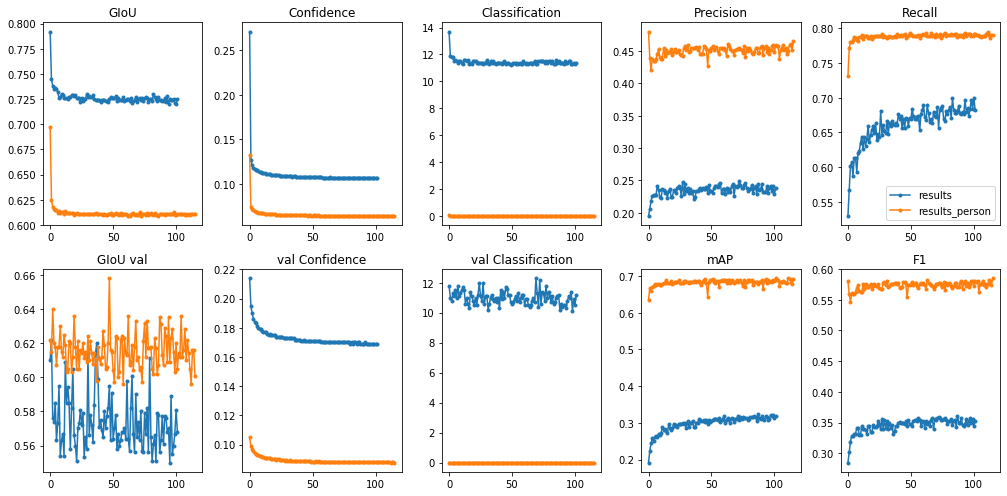

In [31]:
from utils.utils import *
plot_results();

In [5]:
from PIL import Image
path = "coco_gender/images/train/000003_ch01_20190314082142_000085.jpeg"
image = Image.open(path, 'r')
image.show()

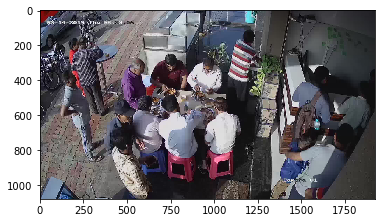

In [6]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open("coco_gender/images/train/000003_ch01_20190314082142_000085.jpeg", 'r')
imshow(np.asarray(pil_im))

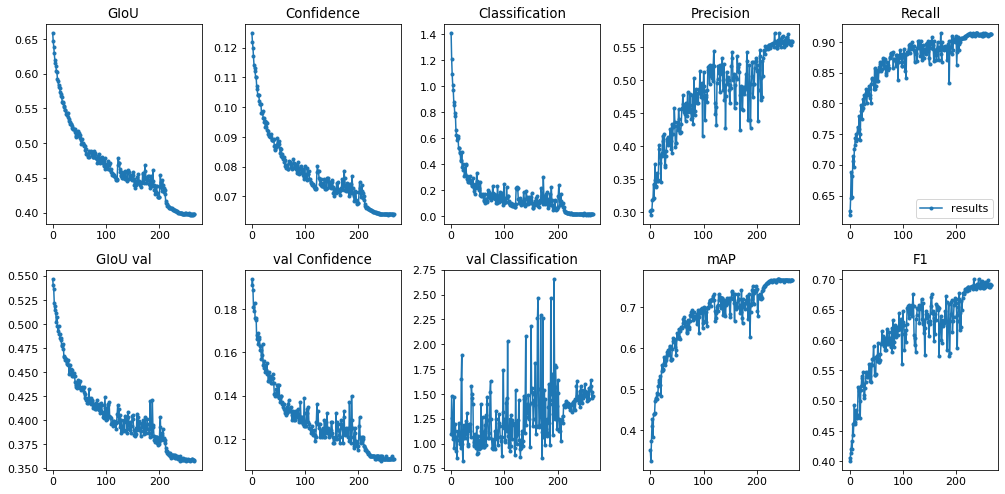

In [10]:
from utils.utils import *
plot_results();